Running Bayesian ML demo...



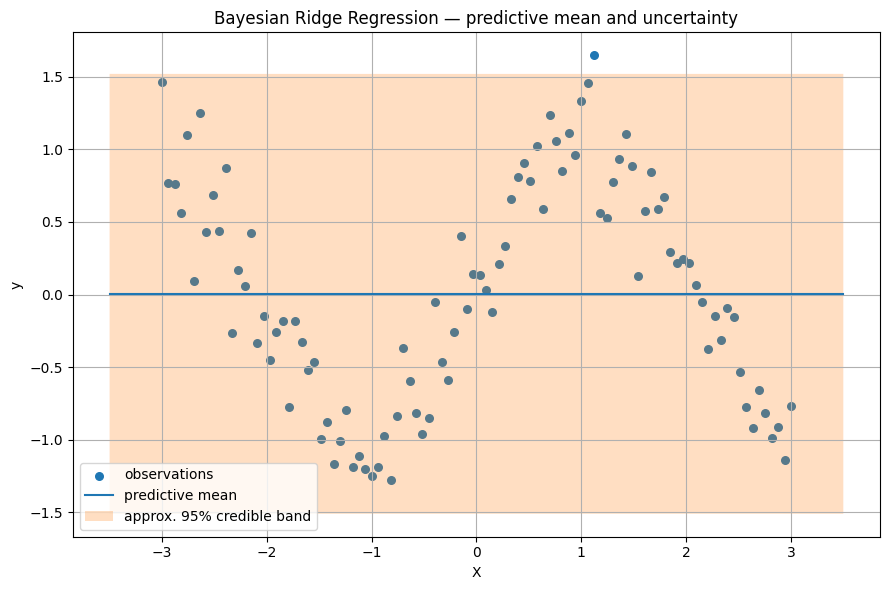


Bayesian Ridge model summary:
alpha_ (precision of weights)     1.739886e+00
lambda_ (precision of noise)      7.600888e+04
n_iter_ (number of iterations)    3.000000e+00
R2_train                          4.734925e-07
R2_test                          -7.450973e-03
dtype: float64


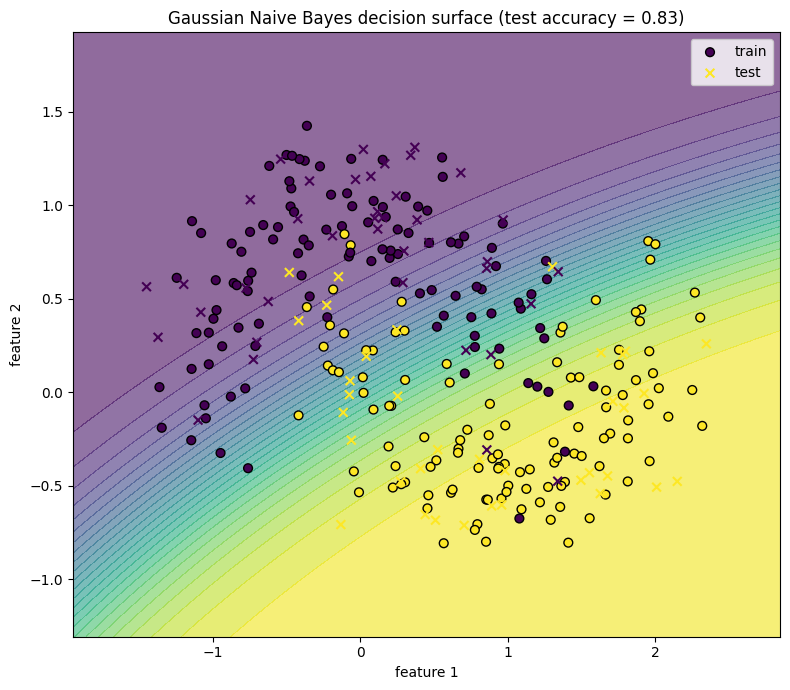


GaussianNB summary:
 train_size  test_size  test_accuracy
        225         75       0.826667

Demo complete — images saved as 'bayesian_ridge.png' and 'gaussian_nb.png'.


In [1]:
# bayesian_demo.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import sys

def bayesian_ridge_demo(save_path="bayesian_ridge.png"):
    # Create noisy sine data
    np.random.seed(1)
    n_samples = 100
    X = np.linspace(-3, 3, n_samples)
    y_true = np.sin(1.5 * X)
    y = y_true + np.random.normal(scale=0.3, size=n_samples)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=42)

    # Fit Bayesian Ridge Regression
    br = BayesianRidge(compute_score=True)
    br.fit(X_train, y_train)

    # Predict on dense grid
    X_plot = np.linspace(-3.5, 3.5, 400).reshape(-1,1)
    y_mean, y_std = br.predict(X_plot, return_std=True)

    # Plot
    plt.figure(figsize=(9,6))
    plt.scatter(X, y, s=30, label="observations")
    plt.plot(X_plot.ravel(), y_mean, label="predictive mean")
    upper = y_mean + 2*y_std
    lower = y_mean - 2*y_std
    plt.fill_between(X_plot.ravel(), lower, upper, alpha=0.25, label="approx. 95% credible band")
    plt.title("Bayesian Ridge Regression — predictive mean and uncertainty")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path, dpi=150)
    plt.show()

    # Model summary
    summary = {
        "alpha_ (precision of weights)": br.alpha_,
        "lambda_ (precision of noise)": br.lambda_,
        "n_iter_ (number of iterations)": getattr(br, "n_iter_", None),
        "R2_train": br.score(X_train, y_train),
        "R2_test": br.score(X_test, y_test)
    }
    print("\nBayesian Ridge model summary:")
    print(pd.Series(summary))

def gaussian_nb_demo(save_path="gaussian_nb.png"):
    # Create 2D classification dataset (moons)
    Xc, yc = make_moons(n_samples=300, noise=0.25, random_state=2)
    Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.25, random_state=42)

    # Fit Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(Xc_train, yc_train)
    acc = gnb.score(Xc_test, yc_test)

    # Create meshgrid for decision probabilities
    x_min, x_max = Xc[:,0].min() - 0.5, Xc[:,0].max() + 0.5
    y_min, y_max = Xc[:,1].min() - 0.5, Xc[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = gnb.predict_proba(grid)[:,1]  # probability of class 1
    Z = probs.reshape(xx.shape)

    # Plot decision surface and points
    plt.figure(figsize=(8,7))
    plt.contourf(xx, yy, Z, levels=25, alpha=0.6)
    plt.scatter(Xc_train[:,0], Xc_train[:,1], c=yc_train, edgecolor='k', s=40, label="train")
    plt.scatter(Xc_test[:,0], Xc_test[:,1], c=yc_test, marker='x', s=40, label="test")
    plt.title(f"Gaussian Naive Bayes decision surface (test accuracy = {acc:.2f})")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(save_path, dpi=150)
    plt.show()

    # Summary
    class_summary = pd.DataFrame({
        "train_size": [Xc_train.shape[0]],
        "test_size": [Xc_test.shape[0]],
        "test_accuracy": [acc]
    })
    print("\nGaussianNB summary:")
    print(class_summary.to_string(index=False))

def main():
    print("Running Bayesian ML demo...\n")
    try:
        bayesian_ridge_demo()
        gaussian_nb_demo()
        print("\nDemo complete — images saved as 'bayesian_ridge.png' and 'gaussian_nb.png'.")
    except Exception as e:
        print("An error occurred:", e, file=sys.stderr)

if __name__ == "__main__":
    main()
